In [1]:
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Импотрируем рабочие данные из заранее подготовленного файла.

In [2]:
f = ['frequency_score','product_variation_score','X1']
X_train = X_train[f]
X_test = X_test[f]
X_train.head(5)

,frequency_score,product_variation_score,X1
6005,-1.851378,1.125827,1
7018,0.264117,1.958170,5
3258,3.112183,2.628244,5
3745,2.454700,2.596755,3
17,-0.684802,1.654165,2


Только что из выборок были взяты именно те переменные, которые ранее, в линейной рергессии, были определены как наиболее значимые. Для проверки того, правильно ли сформировался наш датасет я вывела несколько строк из него для визуальной оценки.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

Провели шкалирование данных на основе параметров обучающей выборки для корректного построения нейронных сетей.

In [6]:
# pip install --ignore-installed --upgrade tensorflow==1.14.0

In [7]:
# !pip install keras

In [8]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [9]:
rnn = Sequential()

rnn.add(Dense(4, activation = 'tanh', input_dim = 3))

rnn.add(Dense(2, activation = 'tanh'))

rnn.add(Dense(1, activation = 'linear'))

rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [10]:
rnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5728/5728 [==============================] - 2s 347us/sample - loss: 0.4546 - acc: 0.0000e+00
Epoch 2/100
5728/5728 [==============================] - 2s 276us/sample - loss: 0.3769 - acc: 0.0000e+00
Epoch 3/100
5728/5728 [==============================] - 1s 257us/sample - loss: 0.3514 - acc: 0.0000e+00
Epoch 4/100
5728/5728 [==============================] - 2s 339us/sample - loss: 0.3352 - acc: 0.0000e+00
Epoch 5/100
5728/5728 [==============================] - 1s 261us/sample - loss: 0.3245 - acc: 0.0000e+00
Epoch 6/100
5728/5728 [==============================] - 1s 257us/sample - loss: 0.3175 - acc: 0.0000e+00
Epoch 7/100
5728/5728 [==============================] - 2s 262us/sample - loss: 0.3131 - acc: 0.0000e+00
Epoch 8/100
5728/5728 [==============================] - 2s 271us/sample - loss: 0.3092 - acc: 0.0000e+00
Epoch 9/100
5728/5728 [==============================] - 2s 286us/sample - loss: 0.3072 - acc: 0.0000e+0

Так как целью построения нейронной сети является прогнозирование, то слои сети должны расширяться, то есть увеличивается количество нейронов на первом слое после входного.
Путём подбора и проведения некоторого ряда экспериментов было определено, что самый низкий результат среднеквадратической ошибки получается при наличи в сети 4 нейронов на первом скрытом слое и 2-х на втором. 
Также на результаты влияло количество элементов каждой партии при обучении модели. Поэтому это количесво было выбрано равным 10.

In [11]:
y_pred = rnn.predict(X_test)

In [12]:
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)))), sqrt(mean_squared_error(y_test, y_hat))

(0.5495531177533677, 0.5486752853573356)

Построив прогноз и проведя обратное шкалирование, мы вычислили среднеквадратическую ошибку, которая оказалась значительно лучше той, что была в модели множественной линейной регрессии. То есть благодаря нейронной сети нам удалось улучшить качество данной модели. В подтверждение этому можно обратить внимание на следующий график, на котором крайне большое количесво прогнозных значений повторяют реальные данные. 

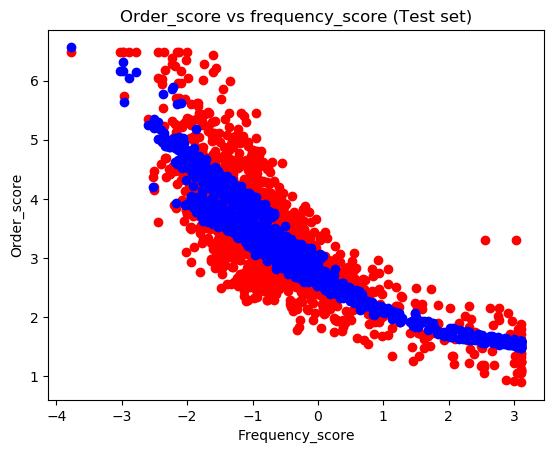

In [14]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_hat, 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('Frequency_score')
plt.ylabel('Order_score')
plt.show()